**Name:** Banoj Kumar Jena  
**Course:**  Data Mining and Predictive Modeling  
**Lab Title:**  Regression Analysis with Regularization Techniques  

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# Preview dataset
print(df.shape)
df.head()


(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Drop CarName as it's not numerical and likely not helpful without encoding
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.5),
    "Ridge Regression": Ridge(alpha=1.0)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2,
        "Cross-Validated R²": cv_r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.018e+08, tolerance: 1.003e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.550e+08, tolerance: 7.207e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.716e+08, tolerance: 1.208e

,MAE,MSE,RMSE,R²,Cross-Validated R²
Linear Regression,2089.382729,8.482008e+06,2912.388793,0.892557,0.287693
Lasso Regression,2092.893302,8.569360e+06,2927.347003,0.891450,0.253541
Ridge Regression,2068.126110,9.863953e+06,3140.693136,0.875051,0.440794


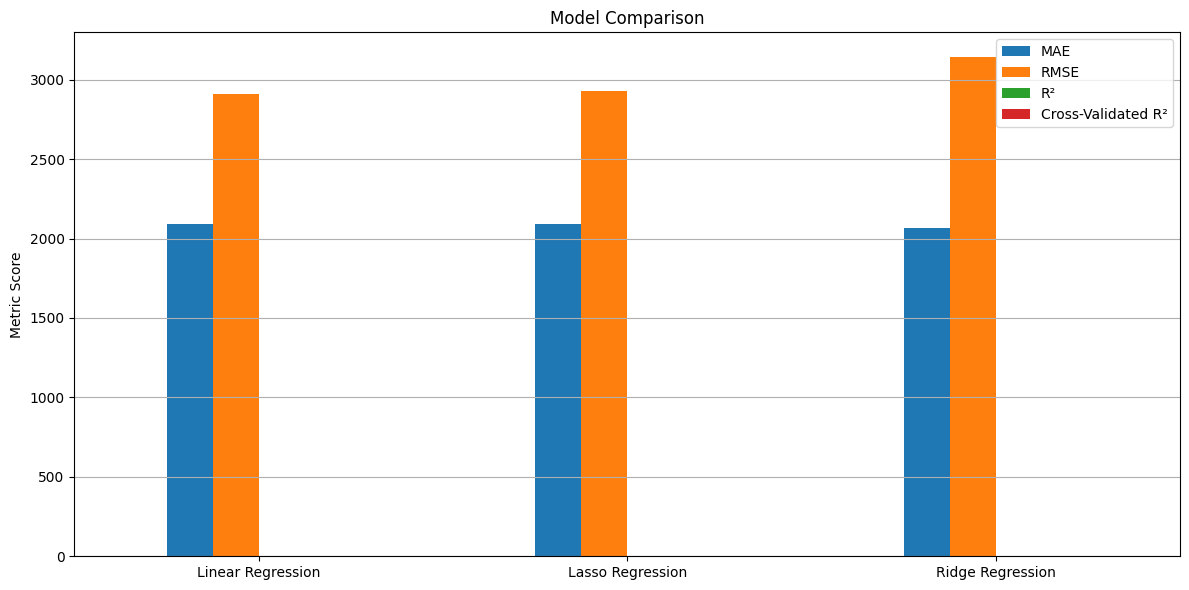

In [5]:
results_df[['MAE', 'RMSE', 'R²', 'Cross-Validated R²']].plot(kind='bar', figsize=(12, 6))
plt.title("Model Comparison")
plt.ylabel("Metric Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
